In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv("combined_data_set.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,SEQN,ALQ111,ALQ121,ALQ130,BPQ020,BPQ030,BPQ080,RIAGENDR,RIDAGEYR,RIDRETH3,BMXBMI,BMDBMIC,DIQ010,LBXTC
0,3,3,109274.0,1.0,4.0,2.0,2.0,NaN,1.0,2.0,29.0,6.0,37.8,4.0,2.0,147.0
1,8,8,109291.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,49.0,3.0,21.9,2.0,2.0,NaN
2,10,10,109293.0,1.0,0.0,NaN,NaN,NaN,NaN,1.0,36.0,3.0,NaN,NaN,1.0,233.0
3,11,11,109295.0,2.0,NaN,NaN,2.0,NaN,2.0,1.0,68.0,7.0,NaN,NaN,NaN,212.0
4,19,19,109313.0,1.0,1.0,2.0,2.0,NaN,2.0,1.0,76.0,3.0,NaN,NaN,NaN,234.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5103 entries, 0 to 5102
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    5103 non-null   int64  
 1   Unnamed: 0.1  5103 non-null   int64  
 2   SEQN          5103 non-null   float64
 3   ALQ111        4759 non-null   float64
 4   ALQ121        4280 non-null   float64
 5   ALQ130        3354 non-null   float64
 6   BPQ020        4462 non-null   float64
 7   BPQ030        1655 non-null   float64
 8   BPQ080        4462 non-null   float64
 9   RIAGENDR      5103 non-null   float64
 10  RIDAGEYR      5103 non-null   float64
 11  RIDRETH3      5103 non-null   float64
 12  BMXBMI        3131 non-null   float64
 13  BMDBMIC       3131 non-null   float64
 14  DIQ010        3035 non-null   float64
 15  LBXTC         3468 non-null   float64
dtypes: float64(14), int64(2)
memory usage: 638.0 KB


In [ ]:
gender = df.RIAGENDR.unique()
gender

array([2., 1.])

In [ ]:

male_1 = df["RIAGENDR"].value_counts()[1]
female_1 = df["RIAGENDR"].value_counts()[2]

print("No. of Female:",female_1)
print('No. of Male:', male_1)


No. of Female: 2652
No. of Male: 2451


In [ ]:
# making two dataset on the basis of gender.
male = df[df['RIAGENDR'] == 1]
female = df[df['RIAGENDR'] == 2]

In [ ]:
# Distributing corresponding to age slot.
male_age_19 = (male["RIDAGEYR"] < 37) & (male["RIDAGEYR"] >18)
male_age_37 = (male["RIDAGEYR"] > 36) & (male["RIDAGEYR"] < 57)
male_age_56 = (male["RIDAGEYR"] >56)

In [ ]:
male_19_36 = (list(male_age_19)).count(True)
male_37_56 = (list(male_age_37)).count(True)
male_57 = (list(male_age_56)).count(True)

print("No. of Male of 19-36 yrs of age:",male_19_36)
print("No. of Male of 37-56 yrs of age:",male_37_56)
print("No. of Male of 57+ yrs of age:",male_57)


No. of Male of 19-36 yrs of age: 631
No. of Male of 37-56 yrs of age: 725
No. of Male of 57+ yrs of age: 1033


In [ ]:

female_age_19 = (female["RIDAGEYR"] < 37) & (female["RIDAGEYR"] >18)
female_age_37 = (female["RIDAGEYR"] > 36) & (female["RIDAGEYR"] < 57)
female_age_56 = (female["RIDAGEYR"] >56)

In [ ]:
female_19_36 = (list(female_age_19)).count(True)
female_37_56 = (list(female_age_19)).count(True)
female_57 = (list(female_age_56)).count(True)

print("No. of Female of 19-36 yrs of age:",female_19_36)
print("No. of Female of 37-56 yrs of age:",female_37_56)
print("No. of Female of 57+ yrs of age:",female_57)


No. of Female of 19-36 yrs of age: 720
No. of Female of 37-56 yrs of age: 720
No. of Female of 57+ yrs of age: 1001


In [ ]:
# Counting the Population on basis of there race.
race= list(df.loc[(df["RIDAGEYR"] < 37) & (df["RIDAGEYR"] >18),"RIDRETH3"])
mexican_american = race.count(1)
other_hispanic = race.count(2)
Non_Hispanic_White = race.count(3)
Non_Hispanic_black = race.count(4)
Non_Hispanic_asian = race.count(6)
other = race.count(7)
print(mexican_american,other_hispanic,Non_Hispanic_asian,Non_Hispanic_black,Non_Hispanic_White,other)

185 148 176 351 411 80


In [ ]:
male_drunker = len(list(df.loc[(df["ALQ121"] >0) & male_age_19,"RIDAGEYR"]))
male_drunker_1 = len(list(df.loc[(df["ALQ121"] >0) & male_age_37,"RIDAGEYR"]))
male_drunker_2 = len(list(df.loc[(df["ALQ121"] >0) & male_age_56,"RIDAGEYR"]))

print("male_drinker_19_36:",male_drunker)
print("male_drinker_37_56:",male_drunker_1)
print("male_drinker_56+:",male_drunker_2)

male_drinker_19_36: 415
male_drinker_37_56: 457
male_drinker_56+: 680


In [ ]:
female_drunker = len(list(df.loc[(df["ALQ121"] >0) & female_age_19,"RIDAGEYR"]))
female_drunker_1 = len(list(df.loc[(df["ALQ121"] >0) & female_age_37,"RIDAGEYR"]))
female_drunker_2 = len(list(df.loc[(df["ALQ121"] >0)& female_age_37,"RIDAGEYR"]))

print("female_drinker_19_36:",female_drunker)
print("female_drinker_37_56:",female_drunker_1)
print("female_drinker_56+:",female_drunker_2)

female_drinker_19_36: 482
female_drinker_37_56: 567
female_drinker_56+: 567


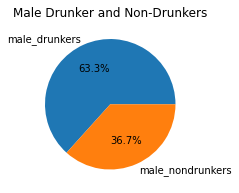

In [ ]:
male_drinker = male_drunker + male_drunker_1 + male_drunker_2
male_nondrinker = male_1 - male_drinker
fig, ax = plt.subplots(figsize= (3,3))
ax.pie([male_drinker,male_nondrinker],labels=["male_drunkers","male_nondrunkers"],autopct = '%.1f%%')
ax.set_title("Male Drunker and Non-Drunkers")
plt.show()


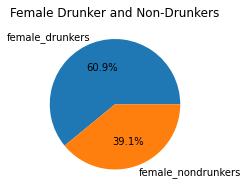

In [ ]:
female_drinker = female_drunker + female_drunker_1 + female_drunker_2
female_nondrinker = female_1 - female_drinker
fig, ax = plt.subplots(figsize= (3,3))
ax.pie([female_drinker,female_nondrinker],labels=["female_drunkers","female_nondrunkers"],autopct = '%.1f%%')
ax.set_title("Female Drunker and Non-Drunkers")
plt.show()

**Plotting the female and male Alcohol drinker**

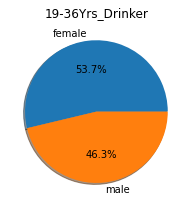

In [ ]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.pie([female_drunker,male_drunker], labels=["female","male"], autopct='%.1f%%',shadow = True)
ax.set_title('19-36Yrs_Drinker')
plt.tight_layout()

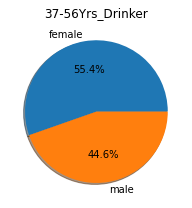

In [ ]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.pie([female_drunker_1,male_drunker_1], labels=["female","male"], autopct='%.1f%%',shadow = True)
ax.set_title('37-56Yrs_Drinker')
plt.tight_layout()

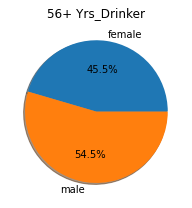

In [ ]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.pie([female_drunker_2,male_drunker_2], labels=["female","male"], autopct='%.1f%%', shadow = True)
ax.set_title('56+ Yrs_Drinker')
plt.tight_layout()

In [ ]:
alcoholic_type = ["Never_last_year","Everyday","Nearly_everyday","4_times_a_Week","2_times_a_week","Once_a_week","3_times_a_month","onces_month","9_times_last_year","4_times_last-year","2_times_last_year"]
BMI = df["BMXBMI"]>0

In [ ]:
BMI_19 = []
for i in range(11):
  bmi = list(df[BMI & female_age_19 &(df["ALQ121"]==i)]["BMXBMI"])
  avg = np.mean(bmi)
  BMI_19.append(avg)


In [ ]:
BMI_37 = []
for i in range(11):
  bmi = list(df[ BMI & female_age_37 &(df["ALQ121"]==i)]["BMXBMI"])
  avg = np.mean(bmi)
  BMI_37.append(avg)



In [ ]:
BMI_56 = []
for i in range(11):
  bmi = list(df[BMI & female_age_56 &(df["ALQ121"]==i)]["BMXBMI"])
  avg = np.mean(bmi)
  BMI_56.append(avg)


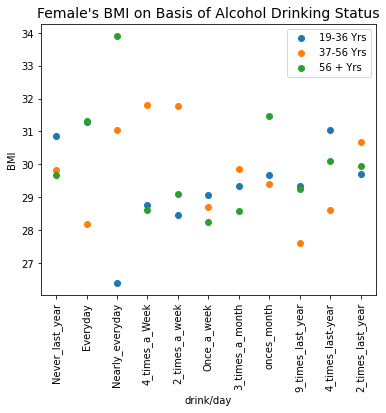

In [ ]:
plt.figure(figsize= (6,5))
plt.scatter(alcoholic_type, BMI_19)
plt.scatter(alcoholic_type, BMI_37)
plt.scatter(alcoholic_type, BMI_56)
plt.xticks(rotation = 90)
plt.xlabel("drink/day")
plt.ylabel("BMI")
plt.title("Female's BMI on Basis of Alcohol Drinking Status",size = 14)
plt.legend(["19-36 Yrs","37-56 Yrs","56 + Yrs"])
plt.show()

In [ ]:
MBMI_19 = []
for i in range(11):
  bmi = list(df[BMI & male_age_19 &(df["ALQ121"]==i)]["BMXBMI"])
  avg = np.mean(bmi)
  MBMI_19.append(avg)

MBMI_37 = []
for i in range(11):
  bmi = list(df[BMI & male_age_37 &(df["ALQ121"]==i)]["BMXBMI"])
  avg = np.mean(bmi)
  MBMI_37.append(avg)


MBMI_56 = []
for i in range(11):
  bmi = list(df[BMI & male_age_56 &(df["ALQ121"]==i)]["BMXBMI"])
  avg = np.mean(bmi)
  MBMI_56.append(avg)


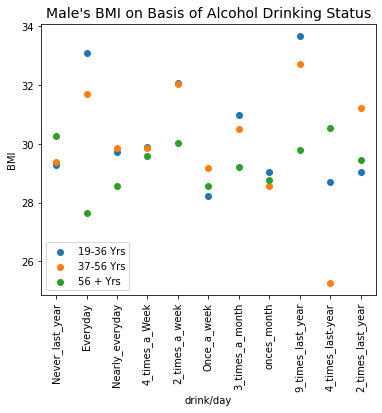

In [ ]:
plt.figure(figsize= (6,5))
plt.scatter(alcoholic_type, MBMI_19)
plt.scatter(alcoholic_type, MBMI_37)
plt.scatter(alcoholic_type, MBMI_56)
plt.xticks(rotation = 90)
plt.xlabel("drink/day")
plt.ylabel("BMI")
plt.title("Male's BMI on Basis of Alcohol Drinking Status",size = 14)
plt.legend(["19-36 Yrs","37-56 Yrs","56 + Yrs"])
plt.show()

In [ ]:
freq_19 = []
for i in range(11):
  fq = list(df.loc[female_age_19 &(df["ALQ121"]==i),"ALQ121"])
  avg = len(fq)
  freq_19.append(avg)


In [ ]:

freq_37 = []
for i in range(11):
  fq = list(df.loc[female_age_37 &(df["ALQ121"]==i),"ALQ121"])
  avg = len(fq)
  freq_37.append(avg)


In [ ]:
freq_56 = []
for i in range(11):
  fq = list(df.loc[female_age_56 &(df["ALQ121"]==i),"ALQ121"])
  avg = len(fq)
  freq_56.append(avg)


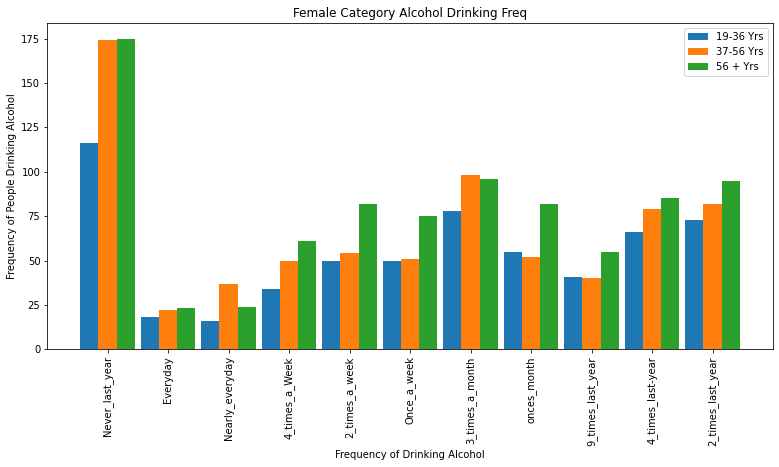

In [ ]:
x_width = np.arange(11)
plt.figure( figsize = (13,6))
plt.bar(x_width - 0.3,freq_19,0.3)
plt.bar(x_width ,freq_37, 0.3)
plt.bar(x_width +0.3,freq_56, 0.3)
plt.xticks(x_width, alcoholic_type,rotation = "vertical")
plt.xlabel("Frequency of Drinking Alcohol")
plt.ylabel("Frequency of People Drinking Alcohol")
plt.legend(["19-36 Yrs","37-56 Yrs","56 + Yrs"])
plt.title("Female Category Alcohol Drinking Freq")
plt.show()

In [ ]:

mfreq_19 = []
for i in range(11):
  fq = list(df.loc[male_age_19 &(df["ALQ121"]==i),"ALQ121"])
  avg = len(fq)
  mfreq_19.append(avg)


In [ ]:
mfreq_37 = []
for i in range(11):
  fq = list(df.loc[male_age_37 &(df["ALQ121"]==i),"ALQ121"])
  avg = len(fq)
  mfreq_37.append(avg)


In [ ]:
mfreq_56 = []
for i in range(11):
  fq = list(df.loc[male_age_56 &(df["ALQ121"]==i),"ALQ121"])
  avg = len(fq)
  mfreq_56.append(avg)


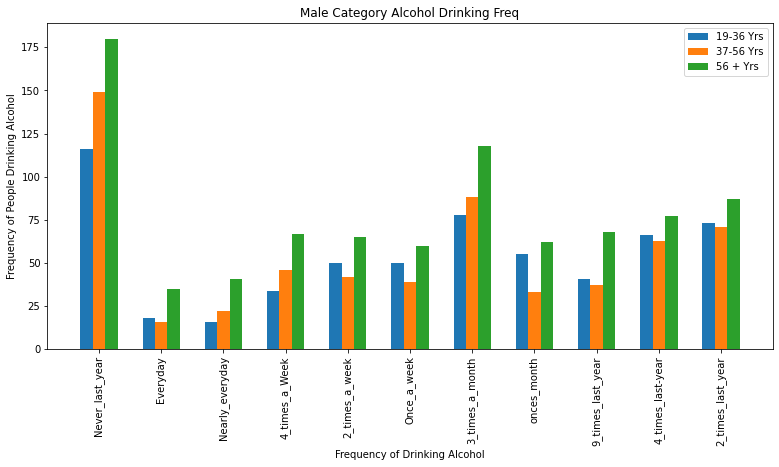

In [ ]:
x_width = np.arange(11)
plt.figure( figsize = (13,6))
plt.bar(x_width - 0.2,freq_19,0.2)
plt.bar(x_width ,mfreq_37, 0.2)
plt.bar(x_width +0.2,mfreq_56, 0.2)
plt.xticks(x_width, alcoholic_type,rotation = "vertical")
plt.xlabel("Frequency of Drinking Alcohol")
plt.ylabel("Frequency of People Drinking Alcohol")
plt.legend(["19-36 Yrs","37-56 Yrs","56 + Yrs"])
plt.title("Male Category Alcohol Drinking Freq")
plt.show()

In [ ]:
BP_EVER =  df[df["BPQ020"] == 1]
BP_2TIMES = df[df["BPQ030"] == 1]
C_EVER =  df[df["BPQ080"] ==1 ]
tags = ["male_drinker","male_nondrinker","female_drinker","female_nondrinker"] 
x= ["Blood_Pressure","Blood_Pressure_2+times","Cholestrol"]

In [ ]:
drinker = (df["ALQ121"]>0) &(df["ALQ121"] < 11)
a = list(BP_EVER[male_age_19 & drinker]["BPQ020"])
b = list(BP_2TIMES[male_age_19 & drinker]["BPQ030"])
c = (list(C_EVER[male_age_19 & drinker]["BPQ080"]))
MBPC_19 = [len(a),len(b),len(c)]

a = list(BP_EVER[male_age_19 & (df["ALQ121"] ==0)]["BPQ020"])
b = list(BP_2TIMES[male_age_19 & (df["ALQ121"] ==0)]["BPQ030"])
c = (list(C_EVER[male_age_19 & (df["ALQ121"] ==0)]["BPQ080"]))
NMBPC_19 = [len(a),len(b),len(c)]

a = list(BP_EVER[female_age_19 & drinker]["BPQ020"])
b = list(BP_2TIMES[female_age_19 & drinker]["BPQ030"])
c = (list(C_EVER[female_age_19 & drinker]["BPQ080"]))
FBPC_19 = [len(a),len(b),len(c)]


a = list(BP_EVER[female_age_19 & (df["ALQ121"]==0)]["BPQ020"])
b = list(BP_2TIMES[female_age_19 & (df["ALQ121"]==0)]["BPQ030"])
c = (list(C_EVER[female_age_19 & (df["ALQ121"]==0)]["BPQ080"]))
NFBPC_19 = [len(a),len(b),len(c)]


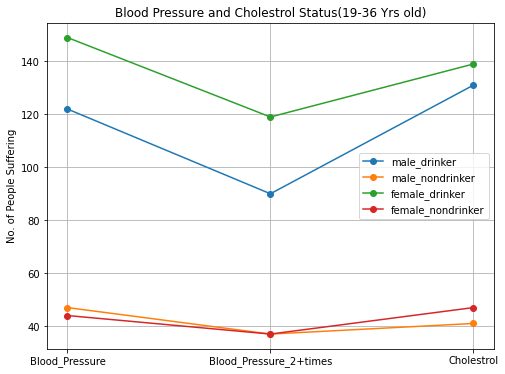

In [ ]:

plt.figure(figsize = (8,6))
plt.plot(x,MBPC_19,marker= "o")
plt.plot(x,NMBPC_19,marker= "o")
plt.plot(x,FBPC_19,marker= "o")
plt.plot(x,NFBPC_19,marker= "o")
plt.grid()
plt.legend(tags)
plt.title("Blood Pressure and Cholestrol Status(19-36 Yrs old)")
plt.ylabel("No. of People Suffering")

plt.show()

In [ ]:
a = list(BP_EVER[male_age_37 & drinker]["BPQ020"])
b = list(BP_2TIMES[male_age_37 & drinker]["BPQ030"])
c = (list(C_EVER[male_age_37 & drinker]["BPQ080"]))
MBPC_37 = [len(a),len(b),len(c)]

a = list(BP_EVER[male_age_37 & (df["ALQ121"] ==0)]["BPQ020"])
b = list(BP_2TIMES[male_age_37 & (df["ALQ121"] ==0)]["BPQ030"])
c = (list(C_EVER[male_age_37 & (df["ALQ121"] ==0)]["BPQ080"]))
NMBPC_37 = [len(a),len(b),len(c)]

a = list(BP_EVER[female_age_37 & drinker]["BPQ020"])
b = list(BP_2TIMES[female_age_37 & drinker]["BPQ030"])
c = (list(C_EVER[female_age_37 & drinker]["BPQ080"]))
FBPC_37 = [len(a),len(b),len(c)]


a = list(BP_EVER[female_age_37 & (df["ALQ121"]==0)]["BPQ020"])
b = list(BP_2TIMES[female_age_37 & (df["ALQ121"]==0)]["BPQ030"])
c = (list(C_EVER[female_age_37 & (df["ALQ121"]==0)]["BPQ080"]))
NFBPC_37 = [len(a),len(b),len(c)]

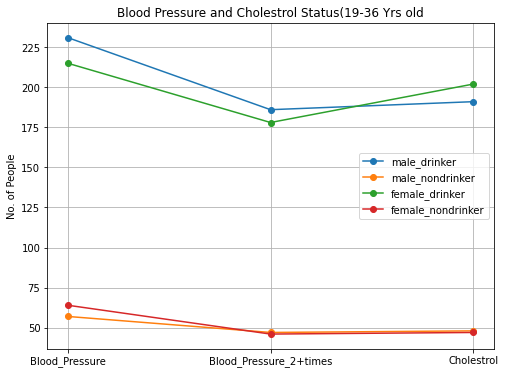

In [ ]:

plt.figure(figsize = (8,6))
plt.plot(x,MBPC_37,marker= "o")
plt.plot(x,NMBPC_37,marker= "o")
plt.plot(x,FBPC_37,marker= "o")
plt.plot(x,NFBPC_37,marker= "o")
plt.grid()
plt.legend(tags)
plt.title("Blood Pressure and Cholestrol Status(19-36 Yrs old)")
plt.ylabel("No. of People Suffering")
plt.show()

In [ ]:
a = list(BP_EVER[male_age_56 & drinker]["BPQ020"])
b = list(BP_2TIMES[male_age_56 & drinker]["BPQ030"])
c = (list(C_EVER[male_age_56 & drinker]["BPQ080"]))
MBPC_56 = [len(a),len(b),len(c)]

a = list(BP_EVER[male_age_56 & (df["ALQ121"] ==0)]["BPQ020"])
b = list(BP_2TIMES[male_age_56 & (df["ALQ121"] ==0)]["BPQ030"])
c = (list(C_EVER[male_age_56 & (df["ALQ121"] ==0)]["BPQ080"]))
NMBPC_56 = [len(a),len(b),len(c)]

a = list(BP_EVER[female_age_56 & drinker]["BPQ020"])
b = list(BP_2TIMES[female_age_56 & drinker]["BPQ030"])
c = (list(C_EVER[female_age_56 & drinker]["BPQ080"]))
FBPC_56 = [len(a),len(b),len(c)]


a = list(BP_EVER[female_age_56 & (df["ALQ121"]==0)]["BPQ020"])
b = list(BP_2TIMES[female_age_56 & (df["ALQ121"]==0)]["BPQ030"])
c = (list(C_EVER[female_age_56 & (df["ALQ121"]==0)]["BPQ080"]))
NFBPC_56 = [len(a),len(b),len(c)]

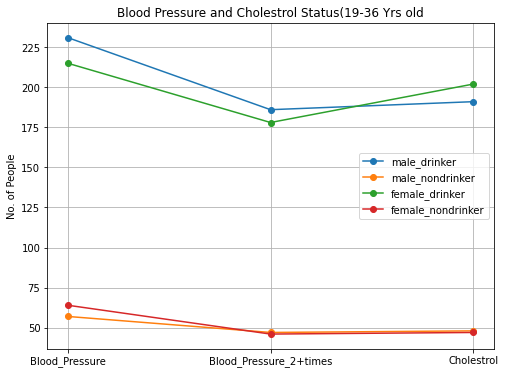

In [ ]:

plt.figure(figsize = (8,6))
plt.plot(x,MBPC_56,marker= "o")
plt.plot(x,NMBPC_56,marker= "o")
plt.plot(x,FBPC_56,marker= "o")
plt.plot(x,NFBPC_56,marker= "o")
plt.grid()
plt.legend(tags)
plt.title("Blood Pressure and Cholestrol Status(19-36 Yrs old)")
plt.ylabel("No. of People Suffering")
plt.show()

In [ ]:
df["BMDBMIC"].unique()

array([ 4.,  2., nan,  3.,  1.])

In [ ]:
bmi_category = []
for i in range(1,5):
  bmi = list(df.loc[(df["BMDBMIC"]== i) & (df["ALQ130"]>0) & ( df["ALQ130"]<16),"ALQ130"])
  bmi_category.append(bmi)
print((bmi_category))

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


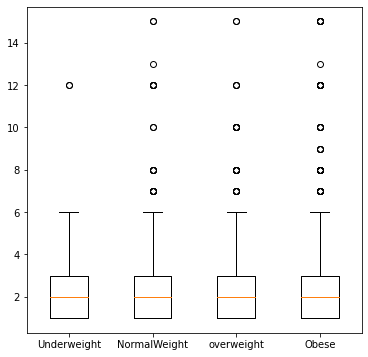

In [ ]:
plt.figure(figsize=(6,6))
plt.boxplot(bmi_category,vert = True)
plt.xticks([1,2,3,4],["Underweight","NormalWeight","overweight","Obese"])
plt.show()

In [ ]:
Cholestrol = []
lbxtc = (df["LBXTC"]>=71) & (df["LBXTC"] <=446)
for i in range(1,16):
  ch = list(df.loc[(df["ALQ130"] == i) & lbxtc ,"LBXTC"])
  Cholestrol.append(np.mean(ch))



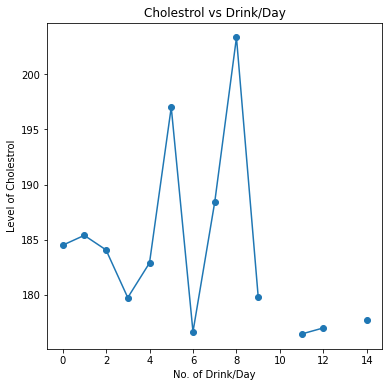

In [ ]:
x = np.arange(15)
plt.figure(figsize = (6,6))
plt.plot(x,Cholestrol,marker = "o")
plt.xlabel("No. of Drink/Day")
plt.ylabel("Level of Cholestrol")
plt.title("Cholestrol vs Drink/Day")
plt.show()